# StackOverflow Developer Survey 2019

## Introduction

This notebook presents an analysis of the StackOverflow Developer Survey 2019 (from now on called _Survey_). It will start with an overview about what has been asked and who the respondents are.

Later on, this analysis will try to answer the following questions about the survey:

* Is there a difference in salary regarding which country a developer resides in?
* What is the correlation between a developers experience, education and their paycheck?
* What factors are relevant for the expected salary of a software developer?

---

## 1. Simple Analysis

In this chapter we will look at a few survey questions and present a short analysis.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.style as style
import helper

plt.rcParams["figure.figsize"] = (20,10)
# plt.rcParams["figure.xticks.rotation"] = (20,10)
style.use('seaborn-muted')

In [25]:
completeDataFrame = pd.read_csv('survey_results_public.csv', low_memory=False)

In [26]:
completeDataFrame["Respondent"].shape

(98855,)

We can see here that 98855 people answered the survey.

In [27]:
list(completeDataFrame.columns)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

And they had 129 questions to answer. The `survey_results_schema.csv` file gives information about each question.

Let's reduce the number of columns to an interesting set.

In [28]:
dataFrame = completeDataFrame[[
    'Respondent', 
    'Hobby', 
    'OpenSource',
    'Country',
    'Student',
    'Employment',
    'FormalEducation',
    'UndergradMajor',
    'CompanySize',
    'YearsCodingProf',
    'Currency',
    'Salary',
    'SalaryType',
    'ConvertedSalary',
    'CurrencySymbol',
    'Gender',
    'Age'
]]

dataFrame = dataFrame.astype({
    'Hobby': 'category',
    'Country': 'category',
    'FormalEducation': 'category',
    'Employment': 'category',
    'YearsCodingProf': 'category',
    'Gender': 'category',
    'ConvertedSalary': 'float',
    'CompanySize': 'category',
    'Age': 'category'
})

dataFrame['FormalEducation'].cat.set_categories(['Associate degree', 'BA',
       'None',
       'MA',
       'PhD',
       'Primary/elementary school', 'Professional degree',
       'Secondary school',
       'Some study without earning a degree'], rename=True, inplace=True)
# changing category names from "0-3" to "0" to be converted to int easier later
dataFrame['YearsCodingProf'].cat.set_categories([
        '0', '12', '15', '18', '21',
       '24', '27', '3', '30',
       '6', '9'], rename=True, inplace=True)
dataFrame['Age'].cat.set_categories([
    '18', '25', '35',
       '45', '55', '65'
        ], rename=True, inplace=True)
dataFrame['CompanySize'].cat.set_categories([
    '1000', '10',
       '10000', '100',
       '20', '5000',
       '500', '1'
        ], rename=True, inplace=True)

In [29]:
dataFrame.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,YearsCodingProf,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,Gender,Age
0,1,Yes,No,Kenya,No,Employed part-time,BA,Mathematics or statistics,20,3,NaN,NaN,Monthly,NaN,KES,Male,25
1,3,Yes,Yes,United Kingdom,No,Employed full-time,BA,"A natural science (ex. biology, chemistry, phy...",10000,18,British pounds sterling (£),51000,Yearly,70841.0,GBP,Male,35
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,BA,"Computer science, computer engineering, or sof...",100,12,U.S. dollars ($),NaN,NaN,NaN,NaN,Male,35
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some study without earning a degree,"Computer science, computer engineering, or sof...",10000,0,South African rands (R),260000,Yearly,21426.0,ZAR,Male,18


### Employment & Hobby

Number of respondents who have answered this question: 95321 (96.43%)


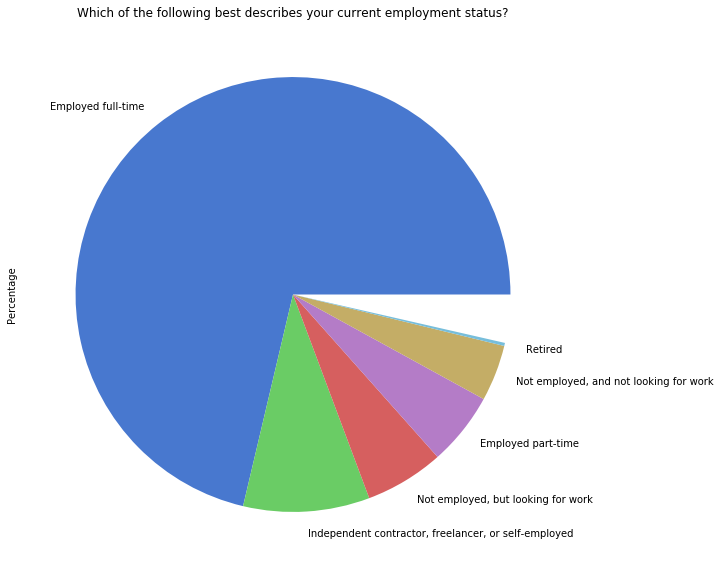

In [30]:
helper.question_respondents(dataFrame, 'Employment')

dataFrame["Employment"].value_counts().apply(lambda x: x / len(dataFrame)).plot(kind='pie')
plt.title("Which of the following best describes your current employment status?")
plt.ylabel("Percentage")
#plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

Most respondents are employed full-time.

Number of respondents who have answered this question: 77903 (78.81%)


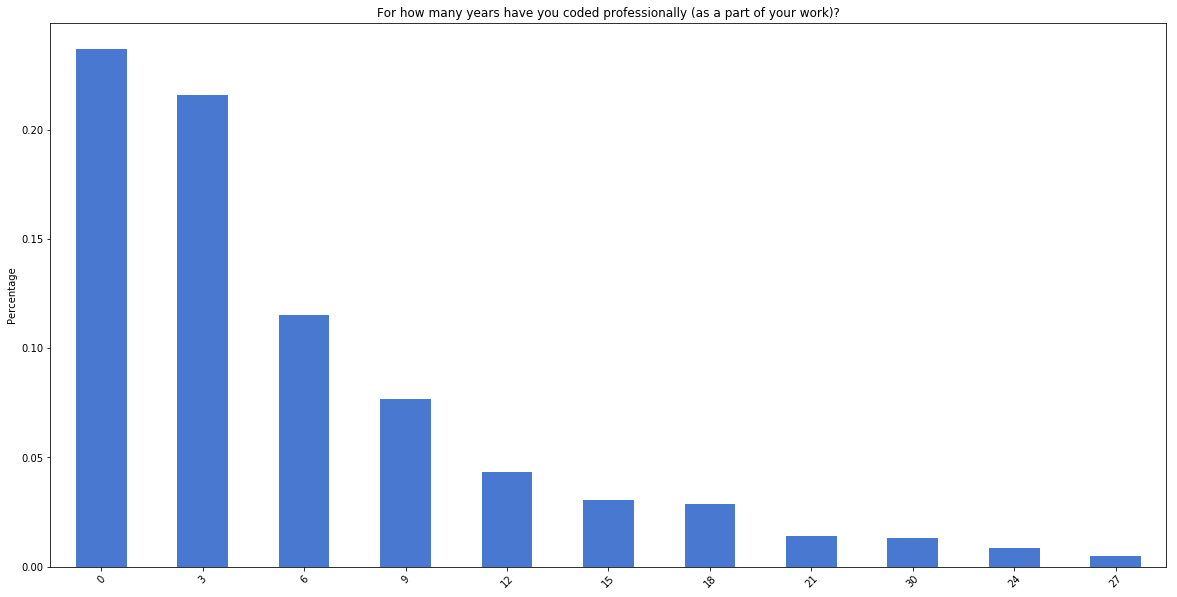

In [31]:
helper.question_respondents(dataFrame, 'YearsCodingProf')

dataFrame["YearsCodingProf"].value_counts().apply(lambda x: x / len(dataFrame)).plot(kind='bar')
plt.title("For how many years have you coded professionally (as a part of your work)?")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

Number of respondents who have answered this question: 98855 (100.00%)


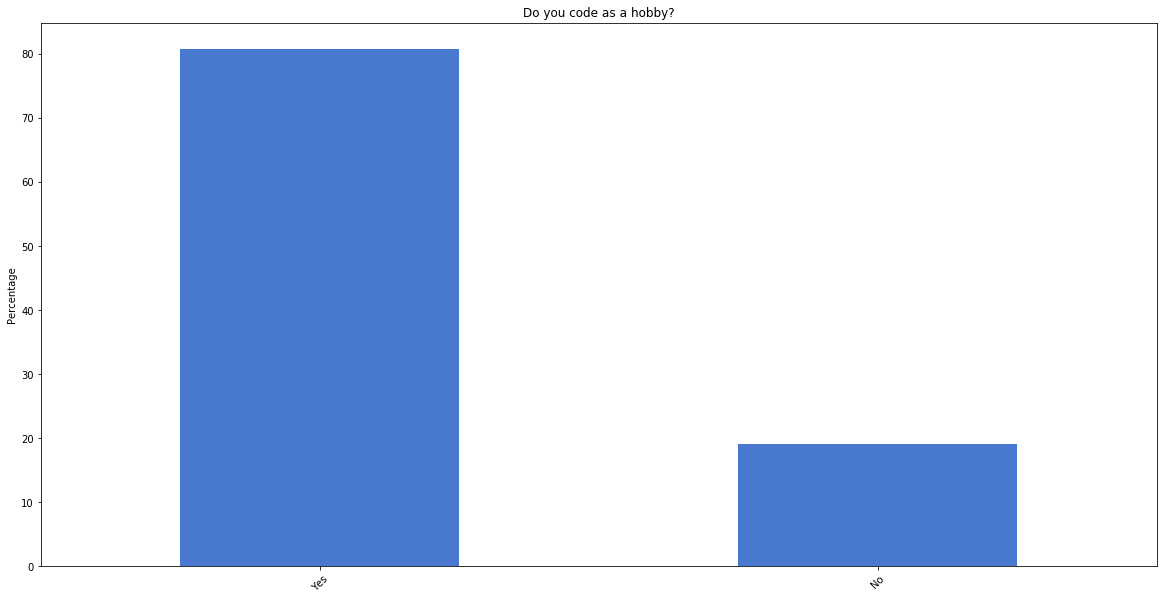

In [32]:
helper.question_respondents(dataFrame, 'Hobby')

dataFrame["Hobby"].value_counts().apply(lambda x: x / len(dataFrame) * 100).plot(kind='bar')
plt.title("Do you code as a hobby?")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

We can see that about 80% of all respondents (also) see coding as their hobby.

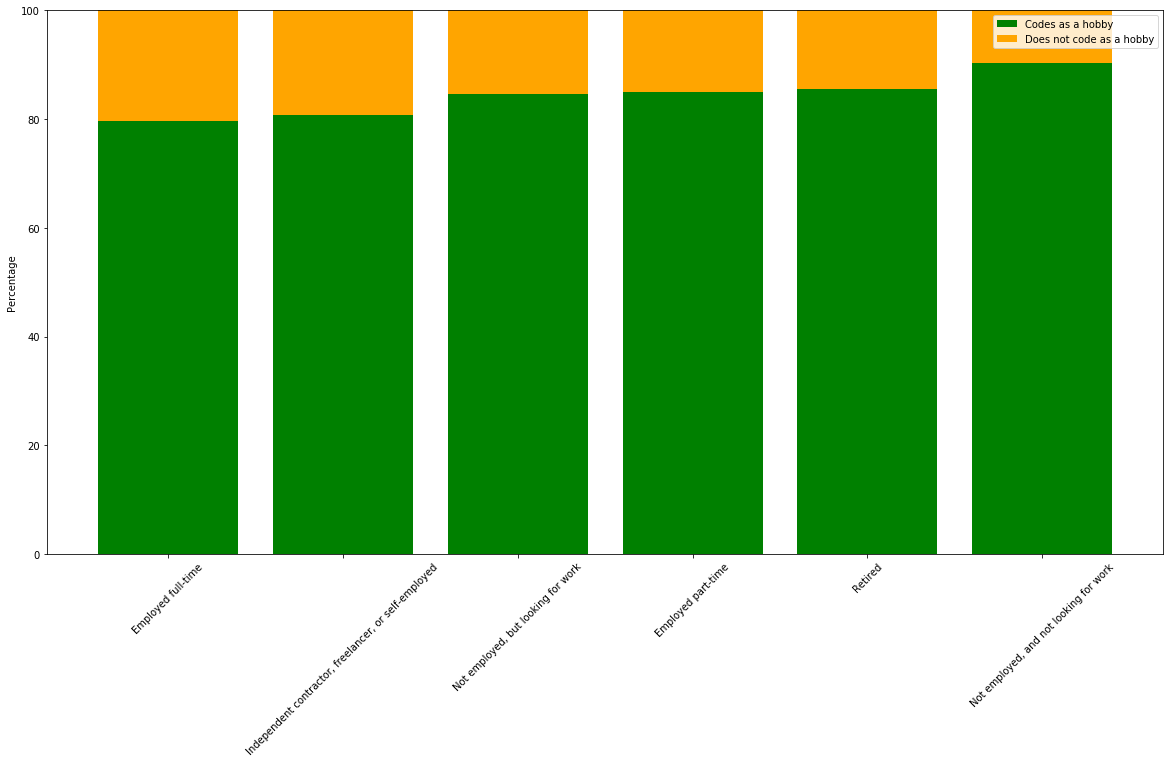

In [33]:
labels = dataFrame["Employment"].astype('category').cat.categories
values = []
for i,c in enumerate(dataFrame["Employment"].astype('category').cat.categories):
    df = dataFrame[dataFrame.Employment == c]
    v = df["Hobby"].value_counts().apply(lambda x: x / len(df) * 100)['Yes']
    values.append(v)
data = sorted(zip(values, labels))
labels = [x for _,x in data]
values = [x for x,_ in data]
x = np.arange(len(values))
plt.bar(labels, values, label="Codes as a hobby", color="green")
plt.bar(labels, 100, bottom=values, label="Does not code as a hobby", color="orange")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.legend()
plt.show()

This shows that about 80% of all developers see programming as their hobby regardless of employment. But the categories "Not employed, and not looking for work" and "Retired" has the highest number of hobbiest.

### Gender

Number of respondents who have answered this question: 64469 (65.22%)


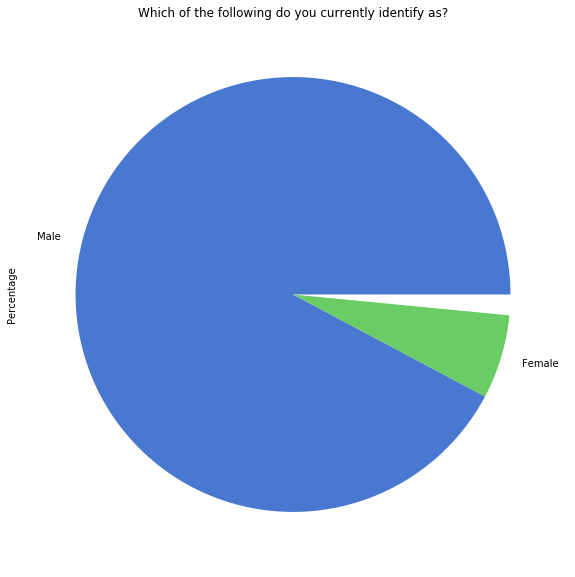

In [34]:
helper.question_respondents(dataFrame, 'Gender')

dgender = dataFrame["Gender"].dropna().astype('category')
dgenderRed = dgender
dgenderRed = helper.keep_categories(dgenderRed, ['Male', 'Female'])
dgenderRed.value_counts().apply(lambda x: x / len(dgender)).plot(kind='pie')
plt.title("Which of the following do you currently identify as?")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

As expected, most respondents are male (92%). Only a very small percentage (~1.5%) identifies as otherwise.

### Country

Number of respondents who have answered this question: 98443 (99.58%)


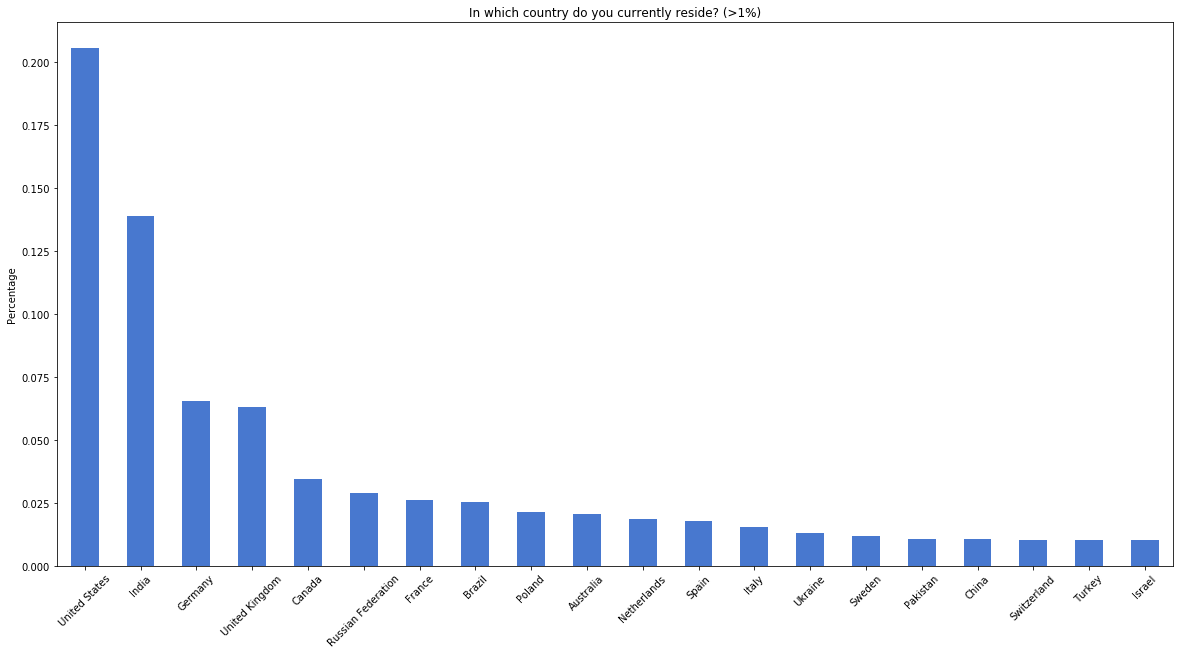

In [35]:
helper.question_respondents(dataFrame, 'Country')

dCountryPerc = dataFrame["Country"].value_counts().apply(lambda x: x / len(dataFrame))
dCountryPerc[dCountryPerc > 0.01].plot(kind='bar')
plt.title("In which country do you currently reside? (>1%)")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

Most respondents reside inside the US, followed by India, Germany, UK and Canada.

Only looking at the top 5 countries we can compare respondents per capita:

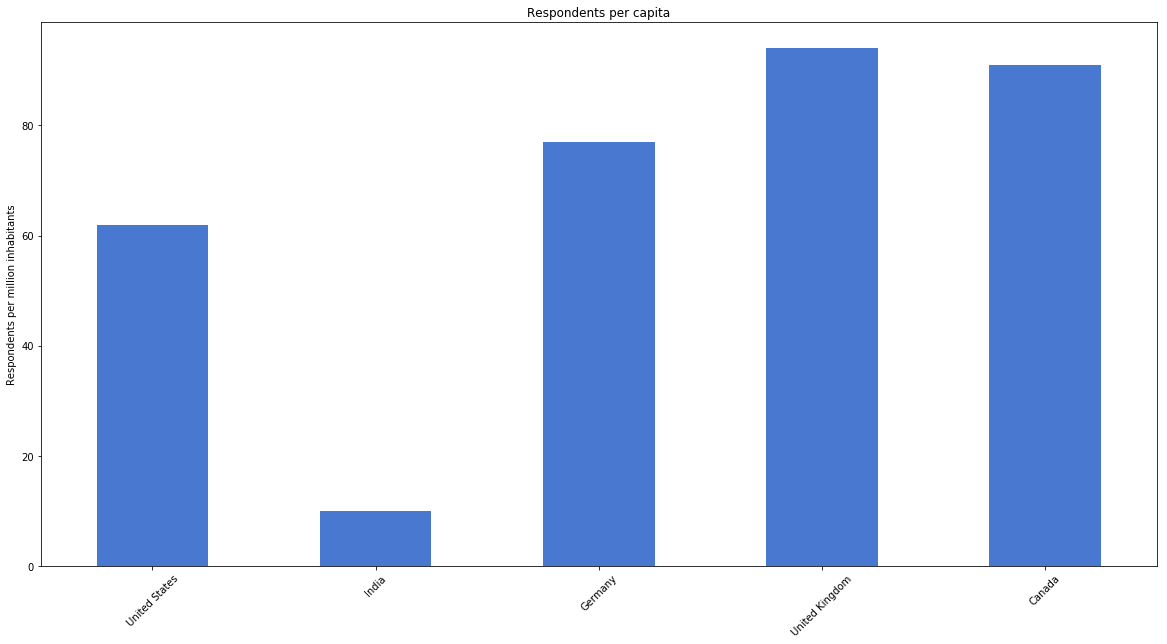

In [36]:
topCountries = {'United States': 327, 'India': 1339, 'Germany': 83, 'United Kingdom': 66, 'Canada': 37}

df = dataFrame['Country'].value_counts().head()
for name, v in df.iteritems():
    df[name] = v / topCountries[name]

df.plot(kind="bar")
plt.ylabel('Respondents per million inhabitants')
plt.title('Respondents per capita')
plt.xticks(rotation=45)
plt.show()

The US has about 60 respondents per 1m inhabitants while india has only 10.

### Education

Number of respondents who have answered this question: 94703 (95.80%)


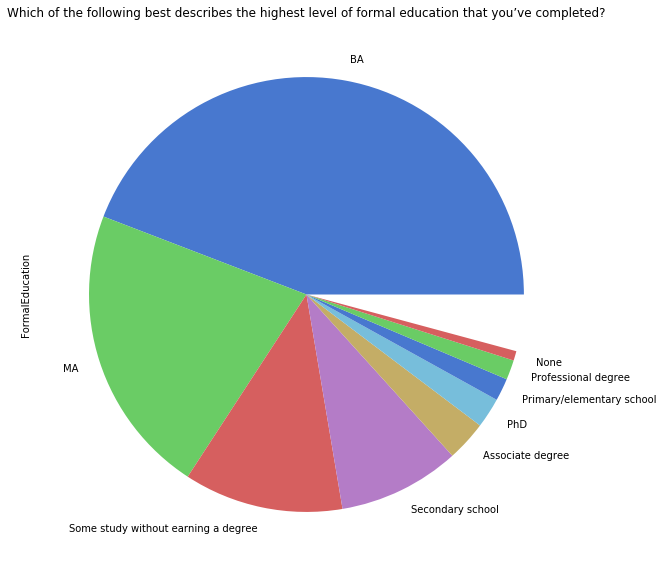

In [37]:
helper.question_respondents(dataFrame, 'FormalEducation')
question = dataFrame['FormalEducation']
question.value_counts().apply(lambda x: x / len(question)).plot(kind='pie')
plt.title("Which of the following best describes the highest level of formal education that you’ve completed?")
# plt.ylabel("Percentage")
plt.xticks(rotation=45)
# plt.yticks(np.arange(0,0.6,step=0.05))
plt.show()

Apparently about half of all respondents have a BA degree while only 22% have completed their master's degree.

In the following chapters we will concentrate on respondents who have completed their Bachelor (BA), Master (MA), PhD or who have no university degree (Secondary school).

### Salary

Now we will have a look at what the respondents get paid. 

We will use 'ConvertedSalary': "Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks." (see survey_results_schema)

Number of respondents who have answered this question: 47702 (48.25%)
Description of the data:
count    46860.000000
mean        97.501892
std        203.746710
min          0.001000
25%         25.332000
50%         56.298000
75%         94.455000
max       2000.000000
Name: ConvertedSalary, dtype: float64


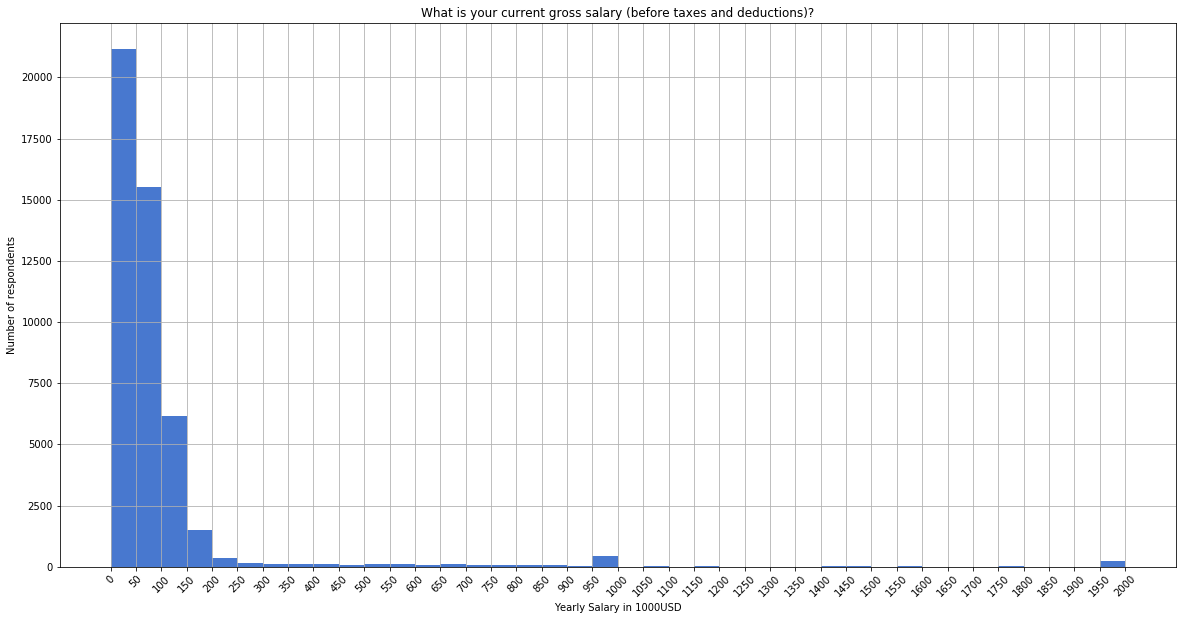

In [46]:
helper.question_respondents(dataFrame, 'ConvertedSalary')
question = dataFrame['ConvertedSalary']
question = question[question > 0].astype('int') / 1000
print("Description of the data:")
print(question.describe())
bins = 40
max_value = question.max()
question.hist(bins=bins)
plt.xlabel('Yearly Salary in 1000USD')
plt.ylabel('Number of respondents')
plt.title('What is your current gross salary (before taxes and deductions)?')
plt.xticks([i * max_value / bins for i in range(bins + 1)])
plt.xticks(rotation=45)
plt.show()

Number of respondents who have answered this question: 47702 (48.25%)
Description of the data:
count    44248.000000
mean        59.195983
std         42.615698
min          0.001000
25%         23.820000
50%         52.783000
75%         85.000000
max        199.950000
Name: ConvertedSalary, dtype: float64


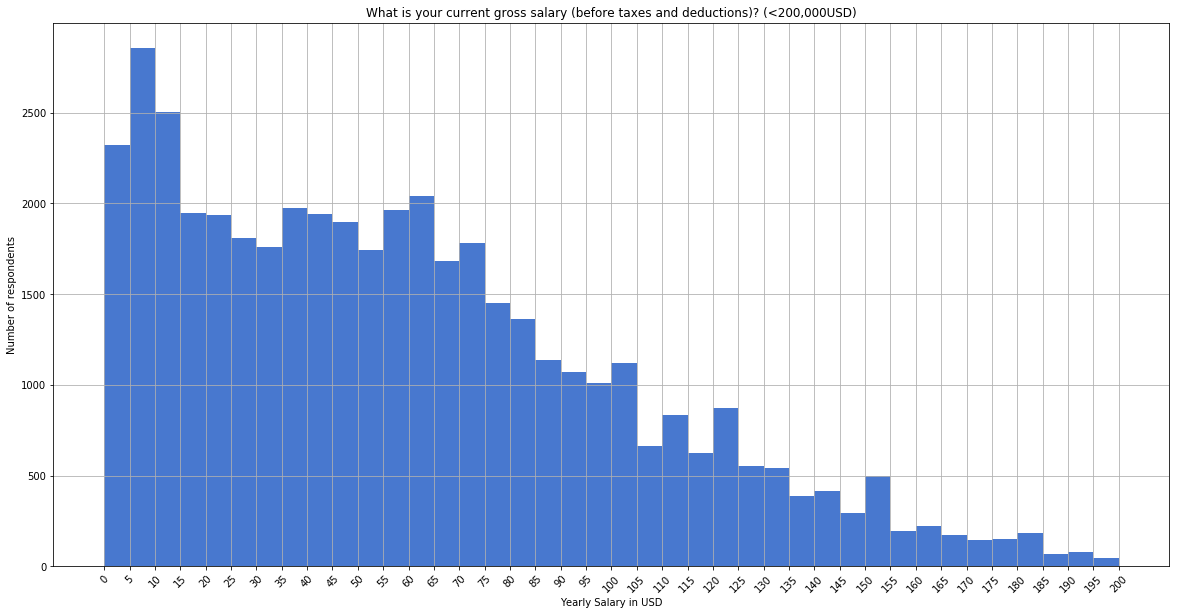

In [45]:
helper.question_respondents(dataFrame, 'ConvertedSalary')
question = dataFrame['ConvertedSalary']
question = question[question > 0][question < 200000] / 1000
print("Description of the data:")
print(question.describe())
bins = 40
max_value = question.max()
question.hist(bins=bins)
plt.xlabel('Yearly Salary in USD')
plt.ylabel('Number of respondents')
plt.title('What is your current gross salary (before taxes and deductions)? (<200,000USD)')
plt.xticks([i * max_value / bins for i in range(bins + 1)])
plt.xticks(rotation=45)
plt.show()

Looking at all salaries we have a mean salary of about 97,000USD. Under 300,000USD (excluding very high salaries) we see a mean value of about 61,000USD.

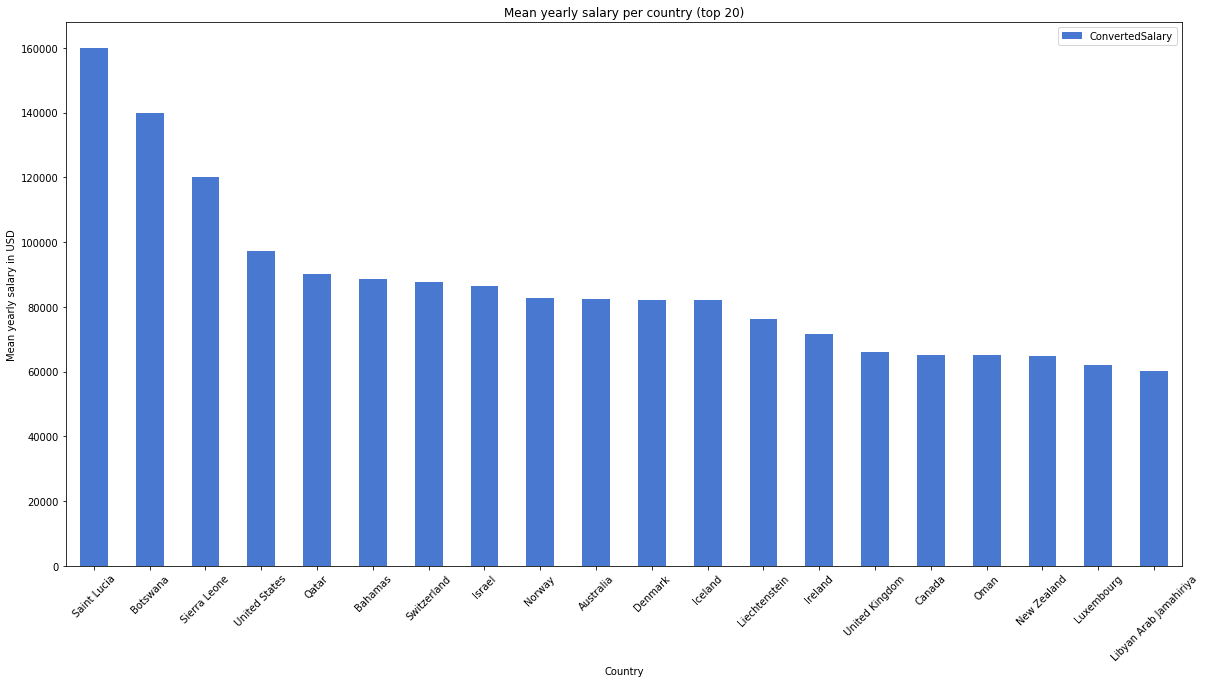

In [40]:
question = dataFrame[['ConvertedSalary', 'Country']].astype({'Country': 'category'})
question = question[question.ConvertedSalary.notnull() 
                    & (question.ConvertedSalary > 0) 
                    & (question.ConvertedSalary < 200000)]
mean = question.groupby('Country').mean()
mean  = mean.sort_values('ConvertedSalary', ascending=False)
mean.head(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Mean yearly salary in USD')
plt.title('Mean yearly salary per country (top 20)')
plt.show()

Apparently Saint Lucia has the highest average salary followed by Saint Lucia and Togo. The US has a mean salary for software developers of about 100,000 USD.

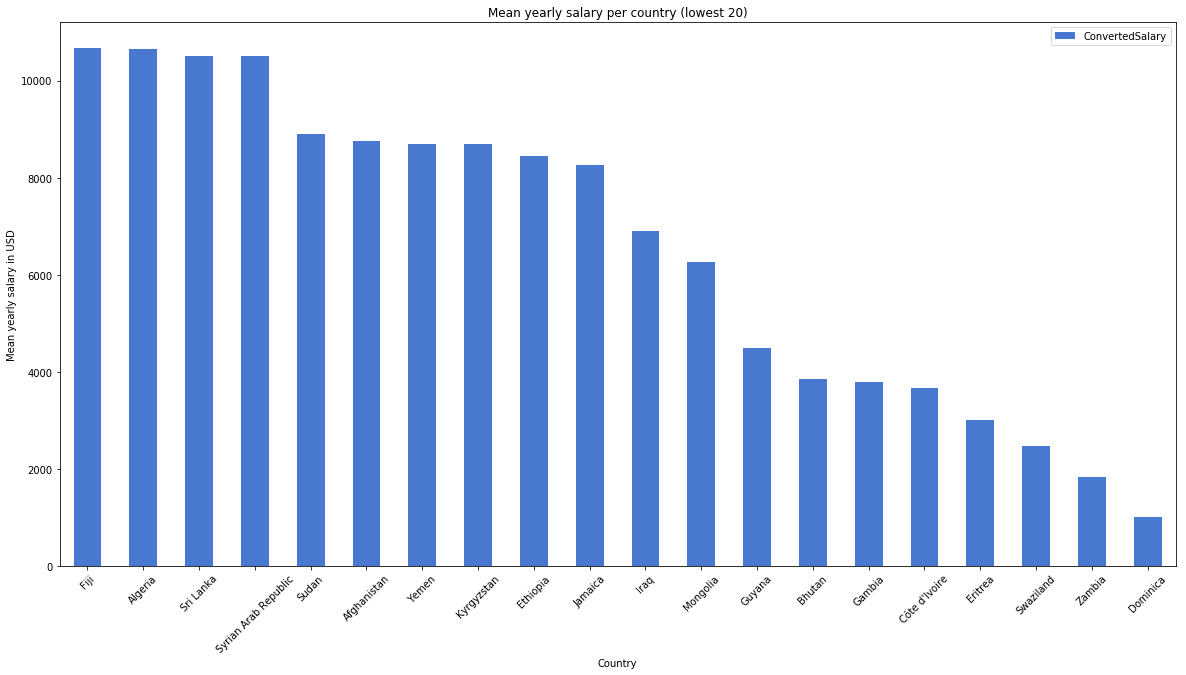

In [41]:
mean[mean.ConvertedSalary > 0].sort_values('ConvertedSalary', ascending=False).tail(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Mean yearly salary in USD')
plt.title('Mean yearly salary per country (lowest 20)')
plt.show()

The lowest salaries can be found in Dominica, Zambia and Swaziland.

Dominica has a GDP/capita of just 9,726 USD, though.

---

## 2. Complex Analysis

In this chapter we will discuss a few more complex research questions. Namely:

* What correlation can be seen between length of career, formal education and salary?
* Can we predict the yearly salary based on length of career, education, company size and country?

### Correlation between Years, Education and salary

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


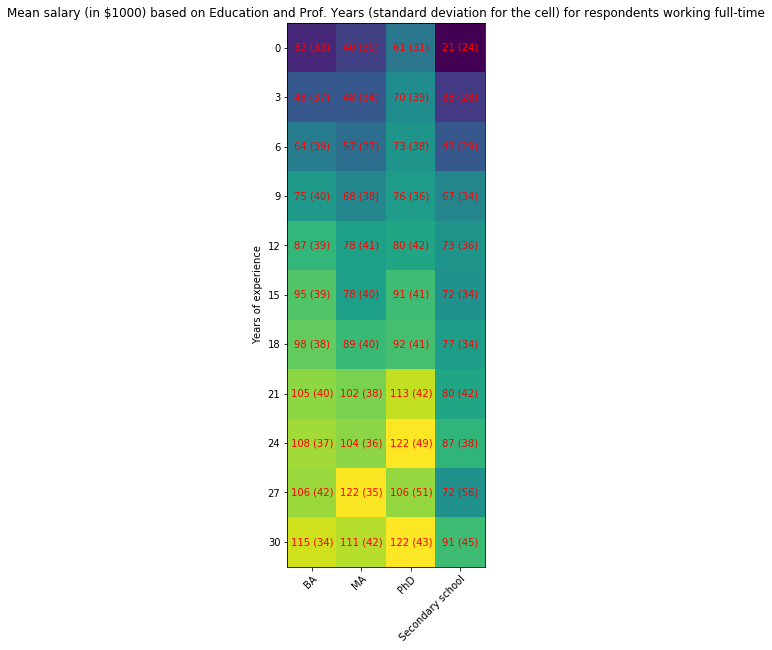

In [42]:
df = dataFrame[['YearsCodingProf', 'FormalEducation', 'ConvertedSalary', 'Employment']].dropna()
df = df[df.ConvertedSalary < 200000]
df = df[df.Employment == 'Employed full-time']
df = df.astype({
    "YearsCodingProf": 'category',
    'FormalEducation': 'category'
})

edu = ['Secondary school','BA', 'MA', 'PhD']
df['FormalEducation'] = helper.keep_categories(df['FormalEducation'], 
                                               edu)
years = df['YearsCodingProf'].cat.categories
education = df['FormalEducation'].cat.categories

yearsSort = list(map(int, years.values))
yearsSort.sort()

mean = df.groupby(['YearsCodingProf', 'FormalEducation']).median()

shape = (11,len(df['FormalEducation'].cat.categories))
values = mean.values.reshape(shape)

# sort values following yearsSort
new_values = np.zeros(shape)
for i in range(len(values)):
    y = int(years[i])
    index = yearsSort.index(y)
    new_values[index] = values[i]
values = new_values

fig, ax = plt.subplots()
im = ax.imshow(values)
# We want to show all ticks...
ax.set_xticks(np.arange(len(education)))
ax.set_yticks(np.arange(len(yearsSort)))
# ... and label them with the respective list entries
ax.set_xticklabels(education)
ax.set_yticklabels(yearsSort)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(education)):
    for j in range(len(yearsSort)):
        std = df[df["FormalEducation"] == education[i]][df['YearsCodingProf'] == str(yearsSort[j])]['ConvertedSalary'].std()
        v = values[j, i]
        text = ax.text(i, j, f"{int(v/ 1000 if not np.isnan(v) else 0)} ({int(std / 1000)})",
                       ha="center", va="center", color="r")

ax.set_title("Mean salary (in $1000) based on Education and Prof. Years (standard deviation for the cell) for respondents working full-time")
ax.set_ylabel("Years of experience")
plt.show()

We use the median value here to reduce the effect of very high salaries.

This plot shows a few clear correlations:
* starting salary is highly dependent on education, a PhD will earn more than double as a BA absolvent
* For BAs, MAs and PhDs more years of experience correspond to a higher salary
* Respondents who answered with "Secondary school" have an overall lower salary.

After ~24 years the second correlation does not apply anymore. This is probably caused by a low number of respondents in this experience range.

The standard deviation is for all cells pretty large (between 50 and 100%), this matches the overall standard deviation on our analysis of all salaries, though.

### Salary predictions

In this chapter we will attempt to train a regression model in order to predict the salary of a given respondents given their:
* Education
* Age
* Country
* Years of experience
* Gender

We will again look at the top five countries regarding number of respondents.

In [20]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

In [21]:
df = dataFrame[['YearsCodingProf', 'Age','FormalEducation', 'Country', 'Gender', 'ConvertedSalary']].dropna().astype({
    'YearsCodingProf': 'float64',
    'Age': 'int'
})
df = df[df["ConvertedSalary"] < 200000]

df['Gender'] = helper.keep_categories(df['Gender'], ['Male', 'Female'])
df['Country'] = helper.keep_categories(df['Country'], ['United States', 'India', 'Germany', 'United Kingdom', 'Canada'])
edu = ['Secondary school','BA', 'MA', 'PhD']
df['FormalEducation'] = helper.keep_categories(df['FormalEducation'], 
                                               edu)
df = df.dropna()

values = df.values
features = values[:,[0,1,2,3,4]]
labels = values[:,-1].astype('float')
max_label = np.max(labels)
labels /= max_label

In [22]:
tra = make_column_transformer((StandardScaler(), [0,1]), (OneHotEncoder(),[2,3,4]),remainder="passthrough")
data = tra.fit_transform(features)
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=41)
feature_names = tra.transformers_[1][1].get_feature_names()
feature_names = np.insert([f[3:] for f in feature_names], 0, ['YearsCodingProf', 'Age'])
print(feature_names)

['YearsCodingProf' 'Age' 'BA' 'MA' 'PhD' 'Secondary school' 'Canada'
 'Germany' 'India' 'United Kingdom' 'United States' 'Female' 'Male']


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
from sklearn.pipeline import make_pipeline

reg = linear_model.ElasticNet(alpha=0.001)
reg.fit(data_train, labels_train)
print('R2 score for training data: {:.3f}'.format(reg.score(data_train, labels_train)))
print('R2 score for test data: {:.3f}'.format(reg.score(data_test, labels_test)))
reg.coef_, reg.intercept_
print()
print('Coefficients for the different features:')
for n,c in zip(feature_names, reg.coef_):
    print("{: <16}\t{:.5f}".format(n,c))

R2 score for training data: 0.567
R2 score for test data: 0.566

Coefficients for the different features:
YearsCodingProf 	0.07775
Age             	-0.00659
BA              	-0.00000
MA              	0.02429
PhD             	0.03045
Secondary school	-0.07787
Canada          	0.00000
Germany         	-0.00467
India           	-0.19886
United Kingdom  	0.00000
United States   	0.16203
Female          	-0.01092
Male            	0.00821


Using a simple linear regression (with combined L1 and L2 regularizer) results in a $R^2$ score of only slighly greater than $0.5$. This indicates a moderate to low model suitability. The $R^2$ score of training and test data lie very close together. This speaks for a good generalisation of the model.

Elastic net uses the following method (where $y$ is the target values, $X$ the input and $\beta$ the parameters):

$\hat {\beta }\equiv {\underset {\beta }{\operatorname {argmin} }}(\|y-X\beta \|^{2}+\lambda _{2}\|\beta \|^{2}+\lambda _{1}\|\beta \|_{1})$

$\lambda_{1}$ and $\lambda_{2}$ are regularization parameters.

Still this model gives us a nice intuition for the importance of all properties looking at the coefficients.

Let us first look at both of the numeric properties:
* As expected is experience an important factor and increases overall salary by roughly 2000USD.
* Age reduces salary, this is probably the case because experience and age tend to be correlated but salaries usually don't grow strict linearly over time.

The one-hot-encoded other properties also show interesting features:
* The model takes having a BA degree as the baseline, MA and PhDs are of cause a plus, while having no degree reduces salary.
* Countries show a similar picture: Canada, UK and Germany are roughly equal, while living in India reduces salaries by a lot and living in the US increases salary.
* Gender plays a small but not negligible role: being male raises salaries slighly.